<a href="https://colab.research.google.com/github/chuxyno/apple-stockprice/blob/main/IDSS_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports most libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# Train test split
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier()

In [ ]:
#Reads the data from source
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income/census-income.data'
df = pd.read_csv(url,header=None,na_values="?")
df = df.dropna() 

In [ ]:
df.head

<bound method NDFrame.head of        0                  1       2            3   4                    5   \
0      39          State-gov   77516    Bachelors  13        Never-married   
1      50   Self-emp-not-inc   83311    Bachelors  13   Married-civ-spouse   
2      38            Private  215646      HS-grad   9             Divorced   
3      53            Private  234721         11th   7   Married-civ-spouse   
4      28            Private  338409    Bachelors  13   Married-civ-spouse   
...    ..                ...     ...          ...  ..                  ...   
32556  27            Private  257302   Assoc-acdm  12   Married-civ-spouse   
32557  40            Private  154374      HS-grad   9   Married-civ-spouse   
32558  58            Private  151910      HS-grad   9              Widowed   
32559  22            Private  201490      HS-grad   9        Never-married   
32560  52       Self-emp-inc  287927      HS-grad   9   Married-civ-spouse   

                       6         

In [ ]:
feature_names =['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']

In [ ]:
# Feature data and target data
# Put the data into datafame using pandas and view head (First 5 rows)
data_csv = pd.DataFrame(df)
data_csv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data_csv[data_csv.columns[1]]

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: 1, Length: 32561, dtype: object

In [ ]:
# Transform workclass column to index
workclass_names = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']
workclass  = data_csv[data_csv.columns[1]]
workclass = [c.replace(' ', '') for c in data_csv[data_csv.columns[1]]]
workclass = [c.replace('?', 'Self-emp-not-inc') for c in workclass]
workclassIndex = np.array([workclass_names.index(i) for i in workclass])
workclassIndex

array([5, 1, 0, ..., 0, 0, 2])

In [ ]:
# Transform education column to index
education_names = ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool','NA']
education = data_csv[data_csv.columns[3]]
education = [c.replace(' ', '') for c in data_csv[data_csv.columns[3]]]
#education = [c.replace('77516', 'NA') for c in education]
educationIndex = np.array([education_names.index(i) for i in education])
educationIndex

array([0, 0, 3, ..., 3, 3, 3])

In [ ]:
# Transform marital status column to index
marital_status_names = ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
marital_status = data_csv[data_csv.columns[5]]
marital_status = [c.replace(' ', '') for c in marital_status]
#education = [c.replace('77516', 'NA') for c in education]
marital_statusIndex = np.array([marital_status_names.index(i) for i in marital_status])
marital_statusIndex

array([2, 0, 1, ..., 4, 2, 0])

In [ ]:
# Transform column column to index
occupation_names = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces','NA']
occupation = data_csv[data_csv.columns[6]]
occupation = [c.replace(' ', '') for c in occupation]
occupation = [c.replace('?', 'NA') for c in occupation]
occupationIndex = np.array([occupation_names.index(i) for i in occupation])
occupationIndex

array([8, 4, 6, ..., 8, 8, 4])

In [ ]:
# Transform relationship column to index
relationship_names = ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried','NA']
relationship = data_csv[data_csv.columns[7]]
relationship = [c.replace(' ', '') for c in relationship]
relationship = [c.replace('?', 'NA') for c in relationship]
relationshipIndex = np.array([relationship_names.index(i) for i in relationship])
relationshipIndex

array([3, 2, 3, ..., 5, 1, 0])

In [ ]:
# Transform race column to index
race_names = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']
race = data_csv[data_csv.columns[8]]
race = [c.replace(' ', '') for c in race]
race = [c.replace('?', 'NA') for c in race]
raceIndex = np.array([race_names.index(i) for i in race])
raceIndex

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Transform sex column to index
sex_names = ['Female', 'Male']
sex = data_csv[data_csv.columns[9]]
sex = [c.replace(' ', '') for c in sex]
sex = [c.replace('?', 'NA') for c in sex]
sexIndex = np.array([sex_names.index(i) for i in sex])
sexIndex

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
# Transform native country column to index
native_country_names = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica,' 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands','Jamaica','NA','Vietnam']
native_country = data_csv[data_csv.columns[13]]
native_country = [c.replace(' ', '') for c in native_country]
native_country = [c.replace('?', 'NA') for c in native_country]
native_countryIndex = np.array([native_country_names.index(i) for i in native_country])
native_countryIndex

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Transform target names column to index
target_names = ['<=50K', '>50K']
target = data_csv[data_csv.columns[14]]
target = [c.replace(' ', '') for c in target]
targetIndex = np.array([target_names.index(i) for i in target])
targetIndex

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Seperate the data into features (X) and target (y) and assign the indexed columns

from scipy.sparse import data
X = data_csv.drop(data_csv.columns[14], axis=1)
X[1] = workclassIndex
X[3] = educationIndex
X[5] = marital_statusIndex
X[6] = occupationIndex
X[7] = relationshipIndex
X[8] = raceIndex
X[9] = sexIndex
X[13] = native_countryIndex
X.columns = feature_names
y= targetIndex

In [ ]:
# Test for importance of columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

importance = rf_model.feature_importances_
columns = X.columns
i=0
print(len(columns))
while i < len(columns):
  print(f"the importance of feature '{columns[i]} 'is  '{round(importance[i] * 100, 2)}%.")
  i+=1

14
the importance of feature 'age 'is  '15.87%.
the importance of feature 'workclass 'is  '3.58%.
the importance of feature 'fnlwgt 'is  '16.94%.
the importance of feature 'education 'is  '3.03%.
the importance of feature 'education-num 'is  '9.19%.
the importance of feature 'marital-status 'is  '11.94%.
the importance of feature 'occupation 'is  '7.49%.
the importance of feature 'relationship 'is  '4.74%.
the importance of feature 'race 'is  '1.35%.
the importance of feature 'sex 'is  '1.33%.
the importance of feature 'capital-gain 'is  '11.21%.
the importance of feature 'capital-loss 'is  '3.35%.
the importance of feature 'hours-per-week 'is  '8.23%.
the importance of feature 'native-country 'is  '1.74%.


In [ ]:
# All Functions

#Choose the algorithm to use. 1 for KNN and 2 for Decision Tree, 3 RFC
def algorithmChoice():
  choice = 0
  choice = input("Select Classifier Algorithm to Use. 1 for KNN, 2 for Decision Tree and 3 for Random Forest Classifier: ")
  if choice == "1":
    from sklearn.neighbors import KNeighborsClassifier
    search_for_best_k(25)
  elif choice == "2":
    #print("Wrong choice, pick another between 1 and 2")
    clf = decision_tree_algorithm()
    print("\n")
    #predict()
  elif choice == "3":
    #print("Wrong choice, pick another between 1 and 2")
    random_forest_classifier_algorithm()
  else:
    algorithmChoice()

#KNN algorithm
def knn_algorithm(k: int):
  # Import necessary modules
  from sklearn.neighbors import KNeighborsClassifier
  
  # Train the data using a train size of 80% of the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  knn = KNeighborsClassifier(n_neighbors=int(k))
  knn.fit(X_train, y_train)

  # Calculate the accuracy of the model
  print(f"Accuracy Score is: {knn.score(X_test, y_test)}")
  # testing the model
  y_pred= knn.predict(X_test)

  # importing accuracy_score
  from sklearn.metrics import accuracy_score

  # printing accuracy
  #print(accuracy_score(y_test, y_pred))
  plot_confusion_matrix(y_pred,y_test)
  #from sklearn.metrics import mean_squared_error
  #from math import sqrt
  #mse = mean_squared_error(y_train, y_pred)
  #rmse = sqrt(mse)
  #print(f"Mean Square Error: {mse}")
  #print(f"Root Mean Square Error: {rmse}")
  #print("\n")
  #predict()
  return knn

#Search for best K to use in KNN algorithm
def search_for_best_k(neighbor_size):
  from sklearn.neighbors import KNeighborsClassifier
  # Split into training and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
  neighbors = np.arange(1, neighbor_size)
  train_accuracy = np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))
  
  # Loop over K values
  for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
  # Generate plot
  plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
  plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
      
  plt.legend()
  plt.xlabel('n_neighbors')
  plt.ylabel('Accuracy')
  plt.show()  
  

# Plot confusion Matrix

def plot_confusion_matrix(y_pred,y_test):
  # importing seaborn
  import seaborn as sns

  # Making the Confusion Matrix
  from sklearn.metrics import confusion_matrix

  # providing actual and predicted values
  try:
    cm = confusion_matrix(y_test, y_pred)

    # If True, write the data value in each cell
    sns.heatmap(cm,annot=True)    
    print("Confusion Matrix")
    
    # saving confusion matrix in png form
    plt.savefig('confusion_Matrix.png')
    print(cm)
  except BaseException as e:
    print('ERROR: ' + str(e))


def decision_tree_algorithm():
  

  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training and 30% test

  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier()

  # Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)

  #Predict the response for test dataset
  y_pred = clf.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))
  return clf

def random_forest_classifier_algorithm():
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
  from sklearn.ensemble import RandomForestClassifier
  rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
  rf_model.fit(X_train, y_train)  

  y_pred = rf_model.predict(X_test)
  # Create confusion matrix
  from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
  confusion_matrix(y_test, y_pred)
  # Display accuracy score
  accuracy_score(y_test, y_pred)
  # Display F1 score
  f1_score(y_test,y_pred)


  print(f"The accuracy based on Random Forest Classifier: {accuracy_score(y_test, y_pred)}")
  print(f"The F1 Score based on Random Forest Classifier: {f1_score(y_test,y_pred)}")
  #plot_confusion_matrix(predictions)
  plot_confusion_matrix(y_pred,y_test)
  #y_train
  #predictions

def predict():
  age = input("Enter Age: ")
  wc = input("Enter Work Class (0: Private, 1: Self-emp-not-inc, 2:Self-emp-inc, 3: Federal-gov, 4: Local-gov, 5: State-gov, 6: Without-pay,\n 7: Never-worked): ")
  fw = input("Enter Final Weight: ")
  edu = input("Enter Education (0: Bachelors, 1: Some-college, 2: 11th, 3: HS-grad, 4: Prof-school, 5: Assoc-acdm, 6: Assoc-voc, 7: 9th, 8: 7th-8th,\n 9: 12th, 10: Masters, 11: 1st-4th, 10th, 12: Doctorate, 13: 5th-6th, 14: Preschool): ")
  edu_num = input("Enter Education-Num: ")
  ms = input("Enter Marital-status (0: Married-civ-spouse, 1: Divorced, 2: Never-married, 3: Separated, 4: Widowed, 5: Married-spouse-absent, \n 6: Married-AF-spouse): ")
  occ = input("Enter Occupation (0: Tech-support, 1: Craft-repair, 2: Other-service, 3: Sales, 4: Exec-managerial, 5: Prof-specialty,\n 6: Handlers-cleaners, 7: Machine-op-inspct, 8: Adm-clerical, 9: Farming-fishing, 10: Transport-moving, 11: Priv-house-serv, \n12: Protective-serv, 13: Armed-Forces): ")
  rela = input("Enter Relationship: (0: Wife, 1: Own-child, 2: Husband, 3: Not-in-family, 4: Other-relative, 5: Unmarried) ")
  race = input("Enter Race (0: White, 1: Asian-Pac-Islander, 2: Amer-Indian-Eskimo, 3: Other, 4: Black): ")
  sex = input("Enter Sex: (0: Female, 1: Male) ")
  cg = input("Enter Capital-gain: ")
  cl = input("Enter Capital-loss: ")
  hw = input("Enter Hours-per-week: ")
  nc = input("Enter Native-country: (0: United-States, 1: Cambodia, 2: England, 3: Puerto-Rico, 4: Canada, 5: Germany, 6: Outlying-US(Guam-USVI-etc), \n7: India, 8: Japan, 9: Greece, 10: South, 11: China, 12: Cuba, 13: Iran, 14: Honduras, 16: Philippines, \n17: Italy, 18: Poland, 19: Jamaica, 20: Vietnam, 21: Mexico, 22: Portugal, 23: Ireland, 24: France, 25: Dominican-Republic, 26: Laos, 27: Ecuador, 28: Taiwan, 29: Haiti, 30: Columbia, 31: Hungary, 31: Guatemala, \n32: Nicaragua, 33: Scotland, 34: Thailand, 35: Yugoslavia, 36: El-Salvador, 37: Trinadad&Tobago, 38: Peru, 39: Hong, 40: Holand-Netherlands) ")
  choice = input("Select Classifier Algorithm to Use. 1 for KNN, 2 for Decision Tree and 3 for Random Forest Classifier:")

  z = [[age,wc,fw,edu,edu_num,ms,occ,rela,race,sex,cg,cl,hw,nc]]
  #z.columns = feature_names
  z = pd.DataFrame(z, columns = feature_names)

  if choice == "1":
    k_predict = knn.predict(z)
    print("\n")
    print(f"Predicted Class by KNN: {target[k_predict[0]]}")
  elif choice == "2":
    k_predict = clf.predict(z)
    print("\n")
    print(f"Predicted Class by Decision Tree: {target[k_predict[0]]}")
  elif choice == "3":
    k_predict = rf_model.predict(z)
    print("\n")
    print(f"Predicted Class by Random Forest Classifier: {target[k_predict[0]]}")





Select Classifier Algorithm to Use. 1 for KNN, 2 for Decision Tree and 3 for Random Forest Classifier: 
Select Classifier Algorithm to Use. 1 for KNN, 2 for Decision Tree and 3 for Random Forest Classifier: 1


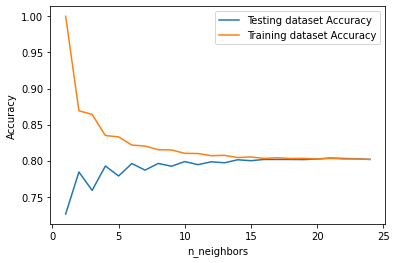

In [ ]:
algorithmChoice()

Enter best k from the graph above to see the accuracy after training: 20
Accuracy Score is: 0.8023952095808383
Confusion Matrix


[[4891   51]
 [1236  335]]


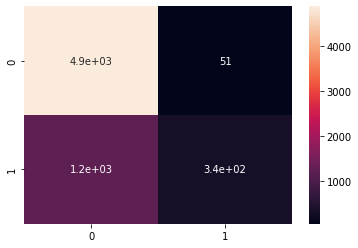

In [ ]:
knn = knn_algorithm(input("Enter best k from the graph above to see the accuracy after training: "))

In [ ]:
predict()

Enter Age: 40
Enter Work Class (0: Private, 1: Self-emp-not-inc, 2:Self-emp-inc, 3: Federal-gov, 4: Local-gov, 5: State-gov, 6: Without-pay,
 7: Never-worked): 0
Enter Final Weight: 100
Enter Education (0: Bachelors, 1: Some-college, 2: 11th, 3: HS-grad, 4: Prof-school, 5: Assoc-acdm, 6: Assoc-voc, 7: 9th, 8: 7th-8th,
 9: 12th, 10: Masters, 11: 1st-4th, 10th, 12: Doctorate, 13: 5th-6th, 14: Preschool): 0
Enter Education-Num: 0
Enter Marital-status (0: Married-civ-spouse, 1: Divorced, 2: Never-married, 3: Separated, 4: Widowed, 5: Married-spouse-absent, 
 6: Married-AF-spouse): 0
Enter Occupation (0: Tech-support, 1: Craft-repair, 2: Other-service, 3: Sales, 4: Exec-managerial, 5: Prof-specialty,
 6: Handlers-cleaners, 7: Machine-op-inspct, 8: Adm-clerical, 9: Farming-fishing, 10: Transport-moving, 11: Priv-house-serv, 
12: Protective-serv, 13: Armed-Forces): 0
Enter Relationship: (0: Wife, 1: Own-child, 2: Husband, 3: Not-in-family, 4: Other-relative, 5: Unmarried) 0
Enter Race (0: Whi